# **Final Project Task 2 - Census EDA**

Requirements

Analyze hours-per-week Target Distribution

Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation.

Check for missing values and report the number and percentage of missing data for each column.

Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality.

Generate bar plots for at least three categorical columns and discuss the frequency distributions.

Identify outliers in at least one numerical column using boxplots.

Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target.

Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week.

Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots.

Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation.

At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

age         workclass  fnlwgt     education  education-num  \
9945    63           Private  213945     Bachelors             13   
252     59         Local-gov  171328          10th              6   
2310    56           Private  128764       7th-8th              4   
8112    48           Private   91251       7th-8th              4   
31160   34  Self-emp-not-inc   56964       HS-grad              9   
16318   22           Private  263670       HS-grad              9   
23243   23           Private  122272       HS-grad              9   
30008   36           Private   48972  Some-college             10   
19150   41           Private  121055       HS-grad              9   
15033   19                 ?  211553  Some-college             10   

           marital-status        occupation   relationship  \
9945   Married-civ-spouse             Sales        Husband   
252               Widowed     Other-service      Unmarried   
2310              Widowed  Transport-moving  Not-in-family   
8112   Married-civ-spouse     Other-service        Husband   
31160  Married-civ-spouse  Transport-moving        Husband   
16318       Never-married     Other-service      Own-child   
23243       Never-married      Craft-repair      Own-child   
30008            Divorced      Adm-clerical      Unmarried   
19150            Divorced  Transport-moving  Not-in-family   
15033       Never-married                 ?      Own-child   

                     race     sex  capital-gain  capital-loss  hours-per-week  \
9945                White    Male         15024             0              40   
252                 Black  Female             0             0              30   
2310                White    Male             0             0              20   
8112   Asian-Pac-Islander    Male             0             0              30   
31160               White    Male             0             0              35   
16318               Black    Male             0             0              80   
23243               White  Female             0             0              40   
30008               White  Female             0             0              40   
19150               White    Male             0             0              40   
15033               White  Female             0             0              35   

      native-country income  
9945            Iran   >50K  
252    United-States  <=50K  
2310   United-States  <=50K  
8112           China  <=50K  
31160  United-States  <=50K  
16318  United-States  <=50K  
23243  United-States  <=50K  
30008  United-States  <=50K  
19150  United-States  <=50K  
15033  United-States  <=50K

Summary Statistics for hours-per-Week:
count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64


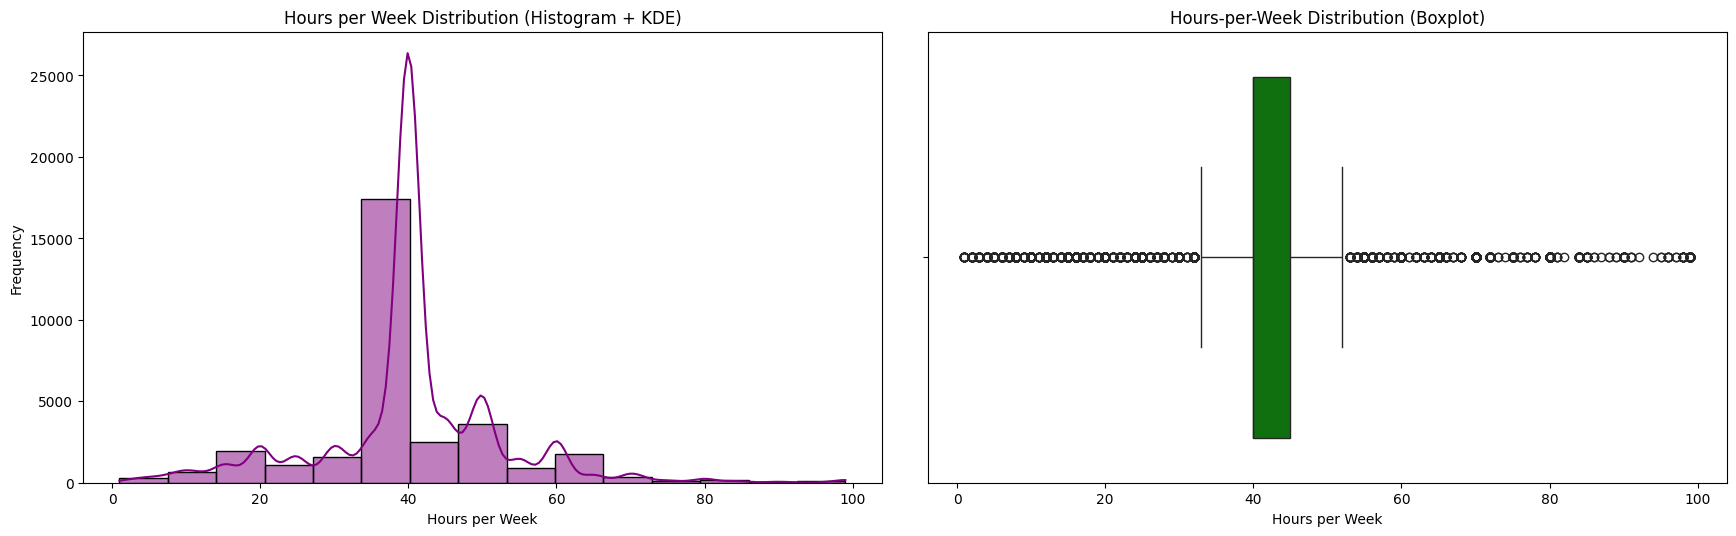

In [11]:
# Calculate summary statistics
summary_stats = data['hours-per-week'].describe()

# Print summary statistics
print("Summary Statistics for hours-per-Week:")
print(summary_stats)

# Create visualizations for distribution analysis
plt.figure(figsize=(18, 6))

# Histogram with KDE (Density Plot)
plt.subplot(1, 2, 1)
sns.histplot(data['hours-per-week'], kde=True, bins=15, color='purple', edgecolor='black')
plt.title('Hours per Week Distribution (Histogram + KDE)')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')

# Boxplot for Outlier Detection
plt.subplot(1, 2, 2)
sns.boxplot(x=data['hours-per-week'], color='green')
plt.title('Hours-per-Week Distribution (Boxplot)')
plt.xlabel('Hours per Week')

# Adjust the layout to avoid overlaps
plt.tight_layout(pad=3.0)

plt.show()

In [5]:
# Shows counts, mean, standard deviation, minimum, quartiles, and maximum for numerical columns
data.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [6]:
# Count missing values in each column
missing_values_count = data.isnull().sum()
print(missing_values_count)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [7]:
# Apparently there are no missing values in data frame. 
# Use the sample function to explore data
data.sample(n=10)

age         workclass  fnlwgt     education  education-num  \
20866   27           Private  213152  Some-college             10   
22293   45  Self-emp-not-inc   28497     Bachelors             13   
988     44           Private  126701       HS-grad              9   
25356   45           Private  102308       Masters             14   
14645   32           Private  402089     Bachelors             13   
15437   34           Private   82938       HS-grad              9   
8873    36           Private  154835       HS-grad              9   
20977   28           Private  148645       HS-grad              9   
13791   52  Self-emp-not-inc  217210       HS-grad              9   
15865   25           Private  135845  Some-college             10   

           marital-status         occupation    relationship  \
20866       Never-married              Sales   Not-in-family   
22293  Married-civ-spouse    Farming-fishing         Husband   
988              Divorced       Craft-repair       Unmarried   
25356  Married-civ-spouse    Exec-managerial         Husband   
14645  Married-civ-spouse       Adm-clerical            Wife   
15437  Married-civ-spouse    Farming-fishing         Husband   
8873            Separated       Adm-clerical       Own-child   
20977       Never-married  Machine-op-inspct       Own-child   
13791             Widowed      Other-service  Other-relative   
15865       Never-married       Adm-clerical       Own-child   

                     race     sex  capital-gain  capital-loss  hours-per-week  \
20866               White    Male             0             0              40   
22293               White    Male             0          1485              70   
988                 White    Male             0             0              40   
25356               White    Male         15024             0              60   
14645               White  Female             0             0               2   
15437               White    Male             0             0              50   
8873   Asian-Pac-Islander  Female             0             0              40   
20977               White  Female             0             0              40   
13791               Black  Female             0             0              40   
15865               White  Female             0             0              40   

      native-country income  
20866  United-States  <=50K  
22293  United-States   >50K  
988    United-States  <=50K  
25356  United-States   >50K  
14645  United-States  <=50K  
15437  United-States  <=50K  
8873     Philippines  <=50K  
20977  United-States  <=50K  
13791  United-States  <=50K  
15865  United-States  <=50K

In [8]:
# There are missing values in the data set, labelled as '?' 
# Replace '?' with NA
data.replace('?', pd.NA, inplace=True)

# Count missing values in each column
missing_values_count = data.isnull().sum()

# Calculate percentage of missing values in each column
total_rows = len(data)
missing_values_percentage = (missing_values_count / total_rows) * 100

# Create a table with missing value information
missing_data = pd.DataFrame({'Missing Values': missing_values_count,
                            'Percentage': missing_values_percentage})

# Filter the DataFrame to keep only rows where at least one missing value exists
missing_data_filtered = missing_data[missing_data.sum(axis=1) > 0]

# Sort by percentage of missing values in descending order
missing_data_filtered = missing_data_filtered.sort_values(by='Percentage', ascending=False)

# Print the table
print(missing_data_filtered)

                Missing Values  Percentage
occupation                1843    5.660146
workclass                 1836    5.638647
native-country             583    1.790486


In [9]:
# Check the type of columns in dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


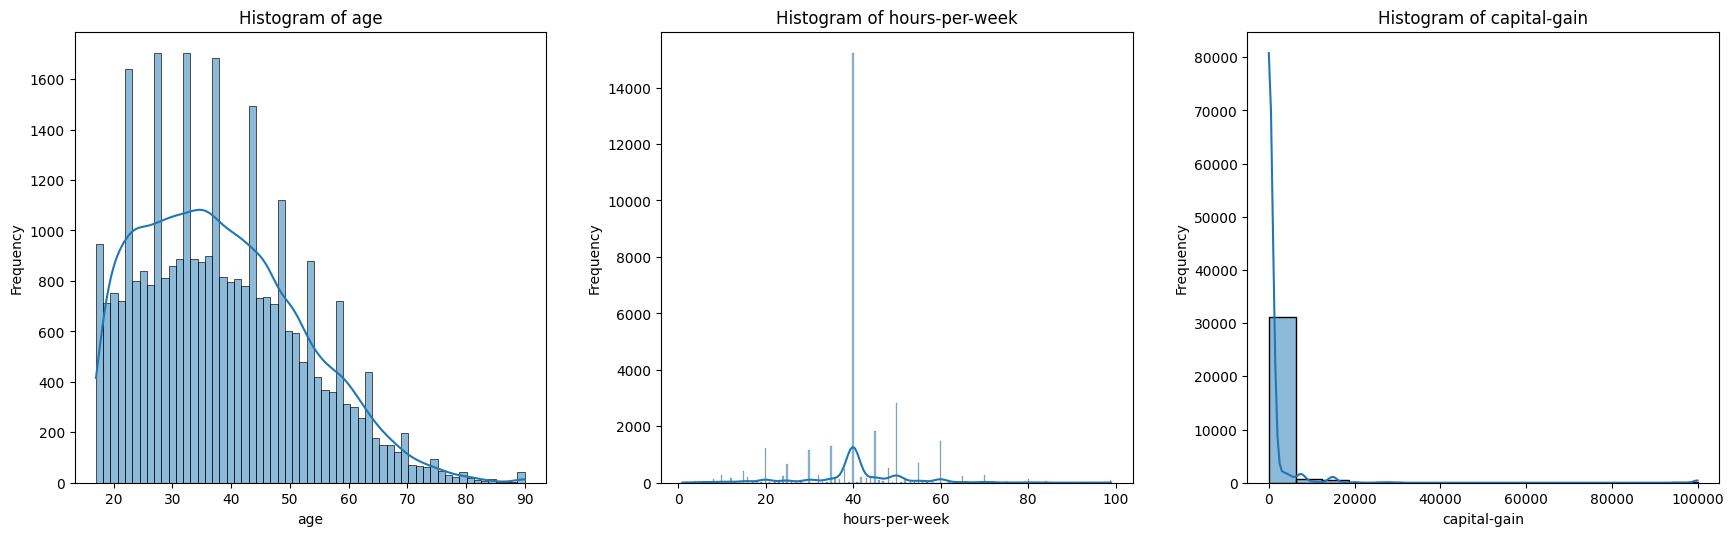

In [12]:
# We select 'age', 'income' and 'hours-per-week' columns, as they are all numerical
numerical_cols = ['age', 'hours-per-week', 'capital-gain'] 

# Create subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot histograms for each column
for i, col in enumerate(numerical_cols):
    sns.histplot(data=data, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust the layout to avoid overlaps
plt.tight_layout(pad=3.0)

plt.show()

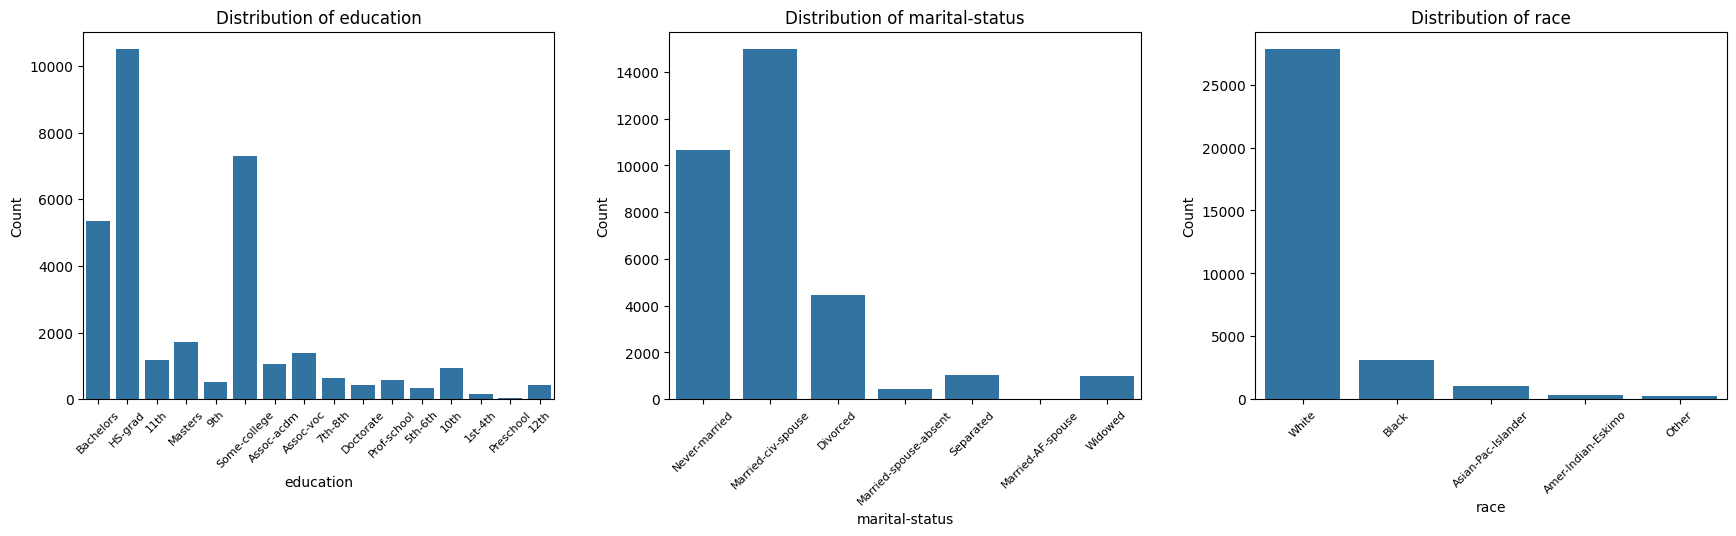

In [14]:
# Categorical columns: 'education', 'marital-status', 'race'
categorical_cols = ['education', 'marital-status', 'race']

# Create subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot bar plots for each categorical column
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=data, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-axis labels for better readability

# Adjust the layout to avoid overlaps
plt.tight_layout(pad=3.0)

plt.show()

## Education
Most Frequent Level:
High School Graduate (HS-grad) is the most commonly reported educational attainment in the dataset.
Other Common Levels:
Some College and Bachelor’s Degree are also frequently observed.
Less Frequent Levels:
Advanced degrees such as Doctorate and Professional School (Prof-school), as well as early education levels like Preschool, are comparatively rare.
## Marital Status
Most Frequent Status:
Married-civ-spouse is the most commonly reported marital status, suggesting that a substantial portion of the population is married.
Other Common Statuses:
Never-married and Divorced are also frequently observed.
Less Frequent Statuses:
Categories such as Married-AF-spouse (married to an armed forces member), Married-spouse-absent, and Widowed are less prevalent.
## Race
Most Frequent Category:
White is the predominant racial category in the dataset, representing a significant majority.
Other Represented Groups:
Black is the second most frequently reported race, followed by Asian-Pacific Islander and American Indian/Eskimo.
Least Frequent Categories:
Other and Black have the lowest representation in the dataset.
## Observations
The distribution of education levels indicates that a significant proportion of individuals have attained a high school diploma or some college education.
The marital status distribution suggests that married individuals constitute a substantial portion of the dataset.
The racial distribution shows a clear majority identifying as White, with other racial groups having comparatively lower representation.

Outliers in 'age':
74       79
222      90
430      80
918      81
1040     90
         ..
32277    90
32367    90
32459    85
32494    82
32525    81
Name: age, Length: 143, dtype: int64


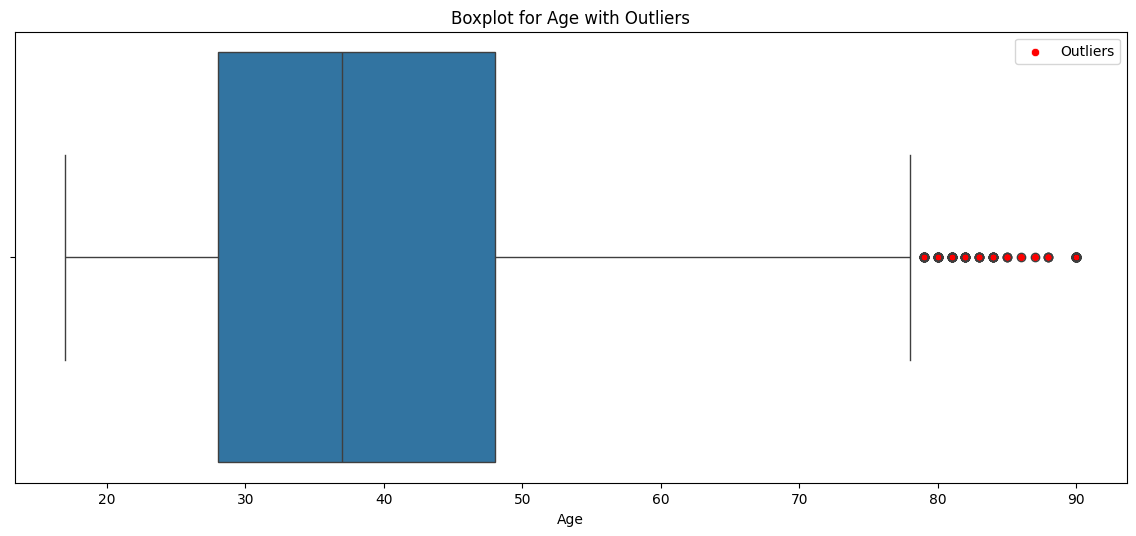

In [15]:

# Calculate the first and third quartiles
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Identify outliers
outliers = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]

# Print the outliers
print(f"Outliers in 'age':\n{outliers['age']}") 

# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', data=data)

# Plot the outliers as red dots
sns.scatterplot(x=outliers['age'], y=[0]*len(outliers), color='red', label='Outliers')

plt.title('Boxplot for Age with Outliers')
plt.xlabel('Age')
plt.legend()

# Adjust the layout to avoid overlaps
plt.tight_layout(pad=3.0)

plt.show()

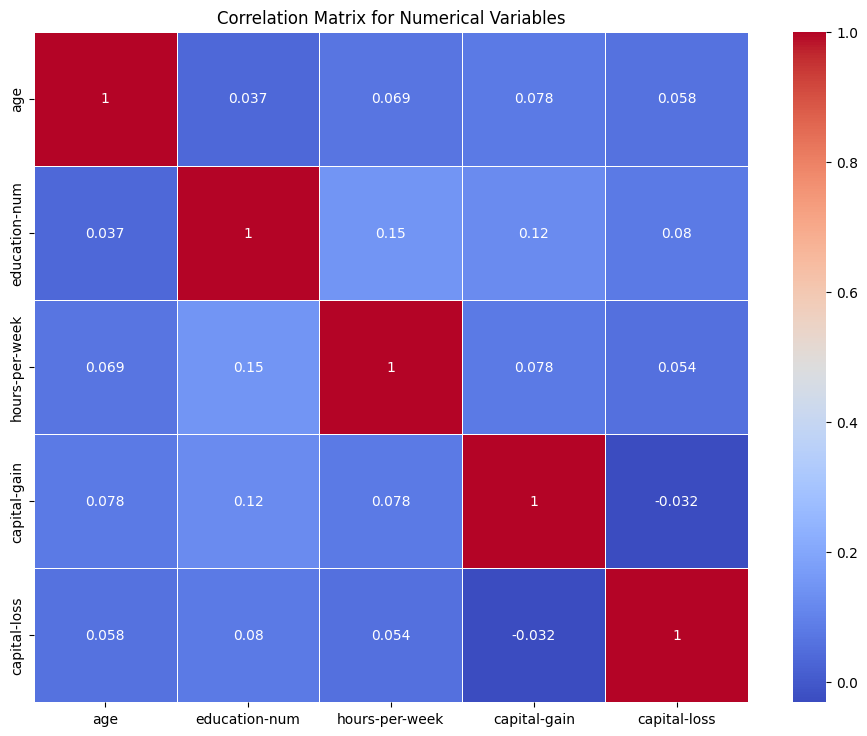

In [16]:
# Select the numerical columns 
numerical_cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss'] 

# Calculate the correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for Numerical Variables')

# Adjust the layout to avoid overlaps
plt.tight_layout(pad=3.0)

plt.show()

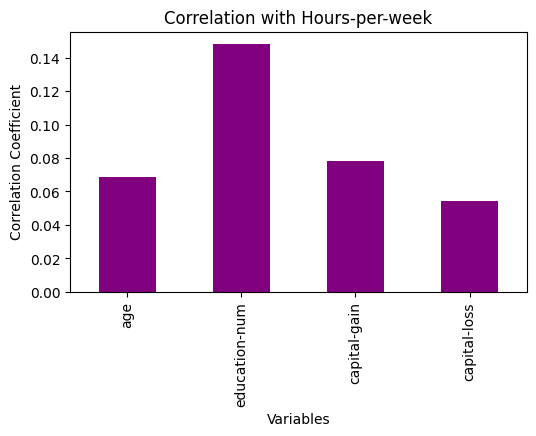

In [19]:
# Correlations with 'hours-per-week'
correlation_target = data[numerical_cols].corr()['hours-per-week'].drop('hours-per-week')

# Bar plot for correlations with target variable
plt.figure(figsize=(6, 5))
correlation_target.plot(kind='bar', color='purple')

plt.title('Correlation with Hours-per-week')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Variables')

# Adjust the layout to avoid overlaps
plt.tight_layout(pad=3.0)

plt.show()

The variable most strongly correlated with weekly working hours is education-num, indicating that the level of education has the most significant positive association with the number of hours worked per week.

Conversely, capital-loss exhibits the weakest correlation with hours worked, suggesting that the amount of capital loss has minimal influence on an individual's weekly working hours.

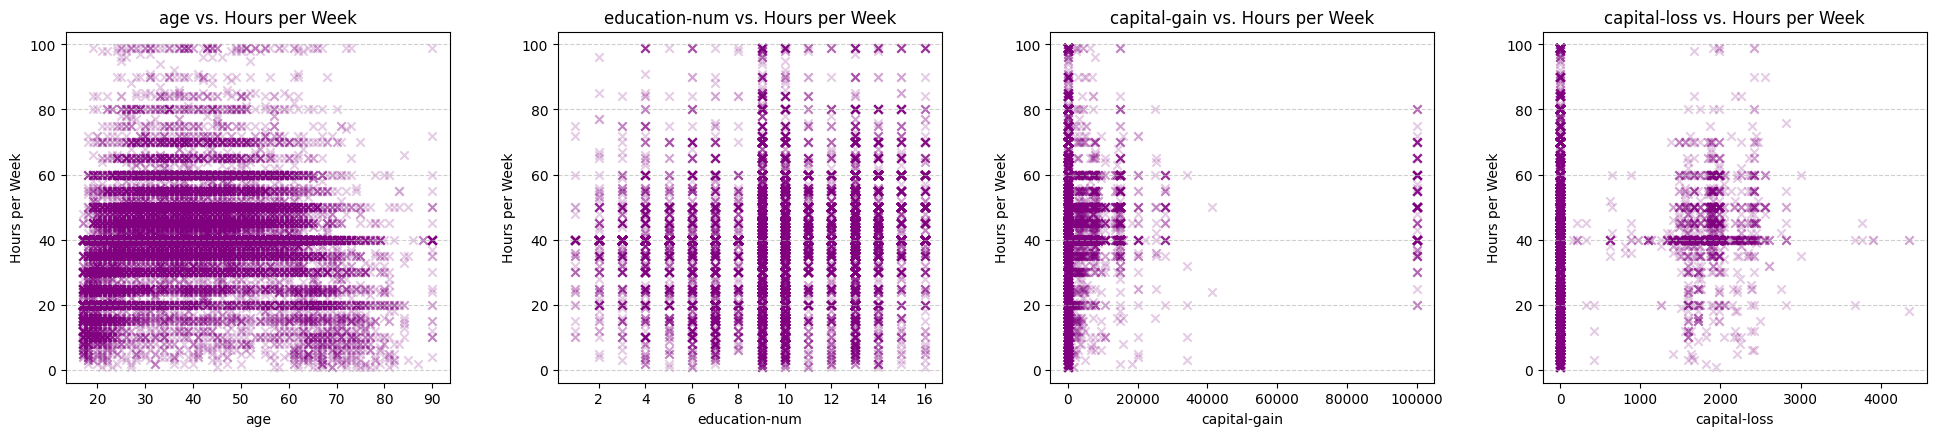

In [21]:
# List of numerical columns excluding 'hours-per-week' as target
numerical_cols_new = ['age', 'education-num', 'capital-gain', 'capital-loss']

# Define the number of subplots
num_cols = len(numerical_cols_new)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(5 * num_cols, 5))

# Loop through each numerical column and create a scatter plot in a subplot
for i, col in enumerate(numerical_cols_new):
    ax = axes[i]  # Correctly reference each subplot
    ax.scatter(data[col], data['hours-per-week'], alpha=0.2, color='purple', marker='x')
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.set_title(f'{col} vs. Hours per Week')
    ax.set_xlabel(col)
    ax.set_ylabel('Hours per Week')

# Adjust the layout to avoid overlaps
plt.tight_layout(pad=3.0)

plt.show()

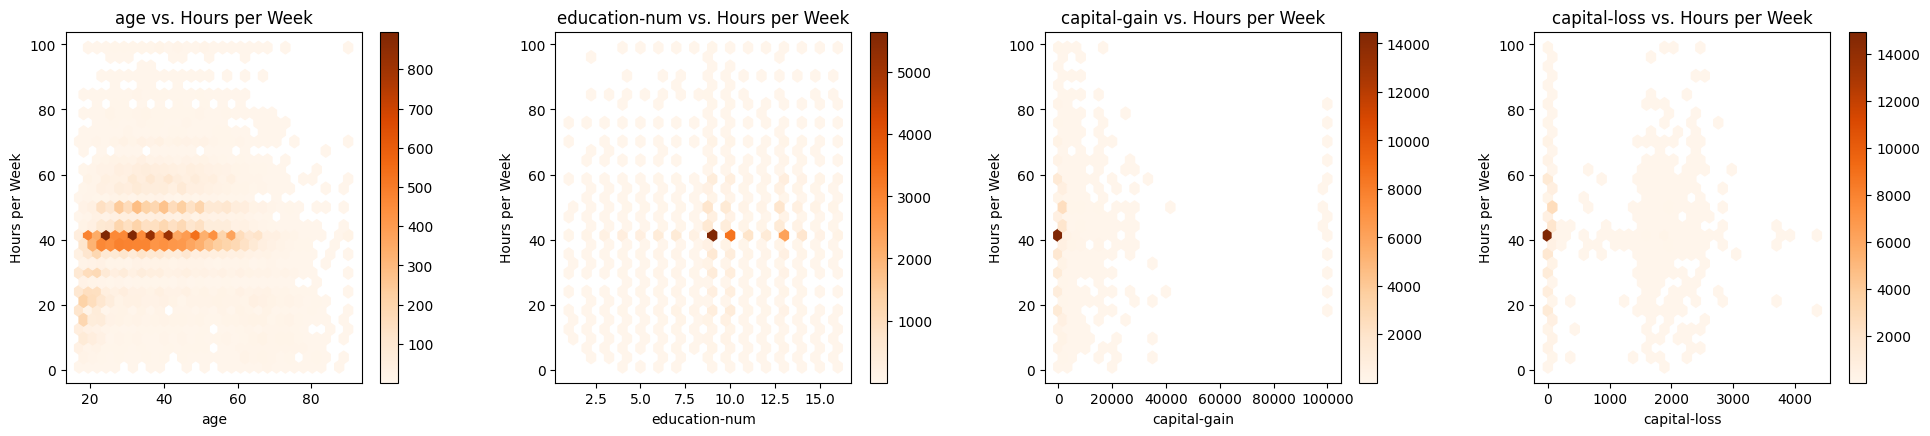

In [22]:
# Create hexbin plots for each numerical variable against 'hours-per-week'
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(5 * num_cols, 5))

for i, col in enumerate(numerical_cols_new):
    ax = axes[i]
    hb = ax.hexbin(data[col], data['hours-per-week'], gridsize=30, cmap='Oranges', mincnt=1)
    ax.set_title(f'{col} vs. Hours per Week')
    ax.set_xlabel(col)
    ax.set_ylabel('Hours per Week')
    fig.colorbar(hb, ax=ax)

# Adjust the layout to avoid overlaps
plt.tight_layout(pad=3.0)

plt.show()

**Age vs. Hours per Week**
Individuals aged between 30 and 50 predominantly work around 40 hours per week. In contrast, younger individuals (under 30) and older individuals (over 60) tend to work fewer hours on average.

**Education Level (Years) vs. Hours per Week**
Individuals with an average education level of approximately 10 years typically work around 40 hours per week. Overall, the number of years of education appears to have a minimal impact on the number of hours worked.

**Capital Gain vs. Hours per Week**
The majority of individuals report no capital gains and work approximately 40 hours per week. Cases of high capital gains (exceeding $20,000) are rare and do not exhibit a clear correlation with the number of hours worked.

**Capital Loss vs. Hours per Week**
Most individuals report no capital losses and work around 40 hours per week. Instances of significant capital losses (greater than $1,000) are relatively uncommon and do not demonstrate a strong relationship with hours worked.

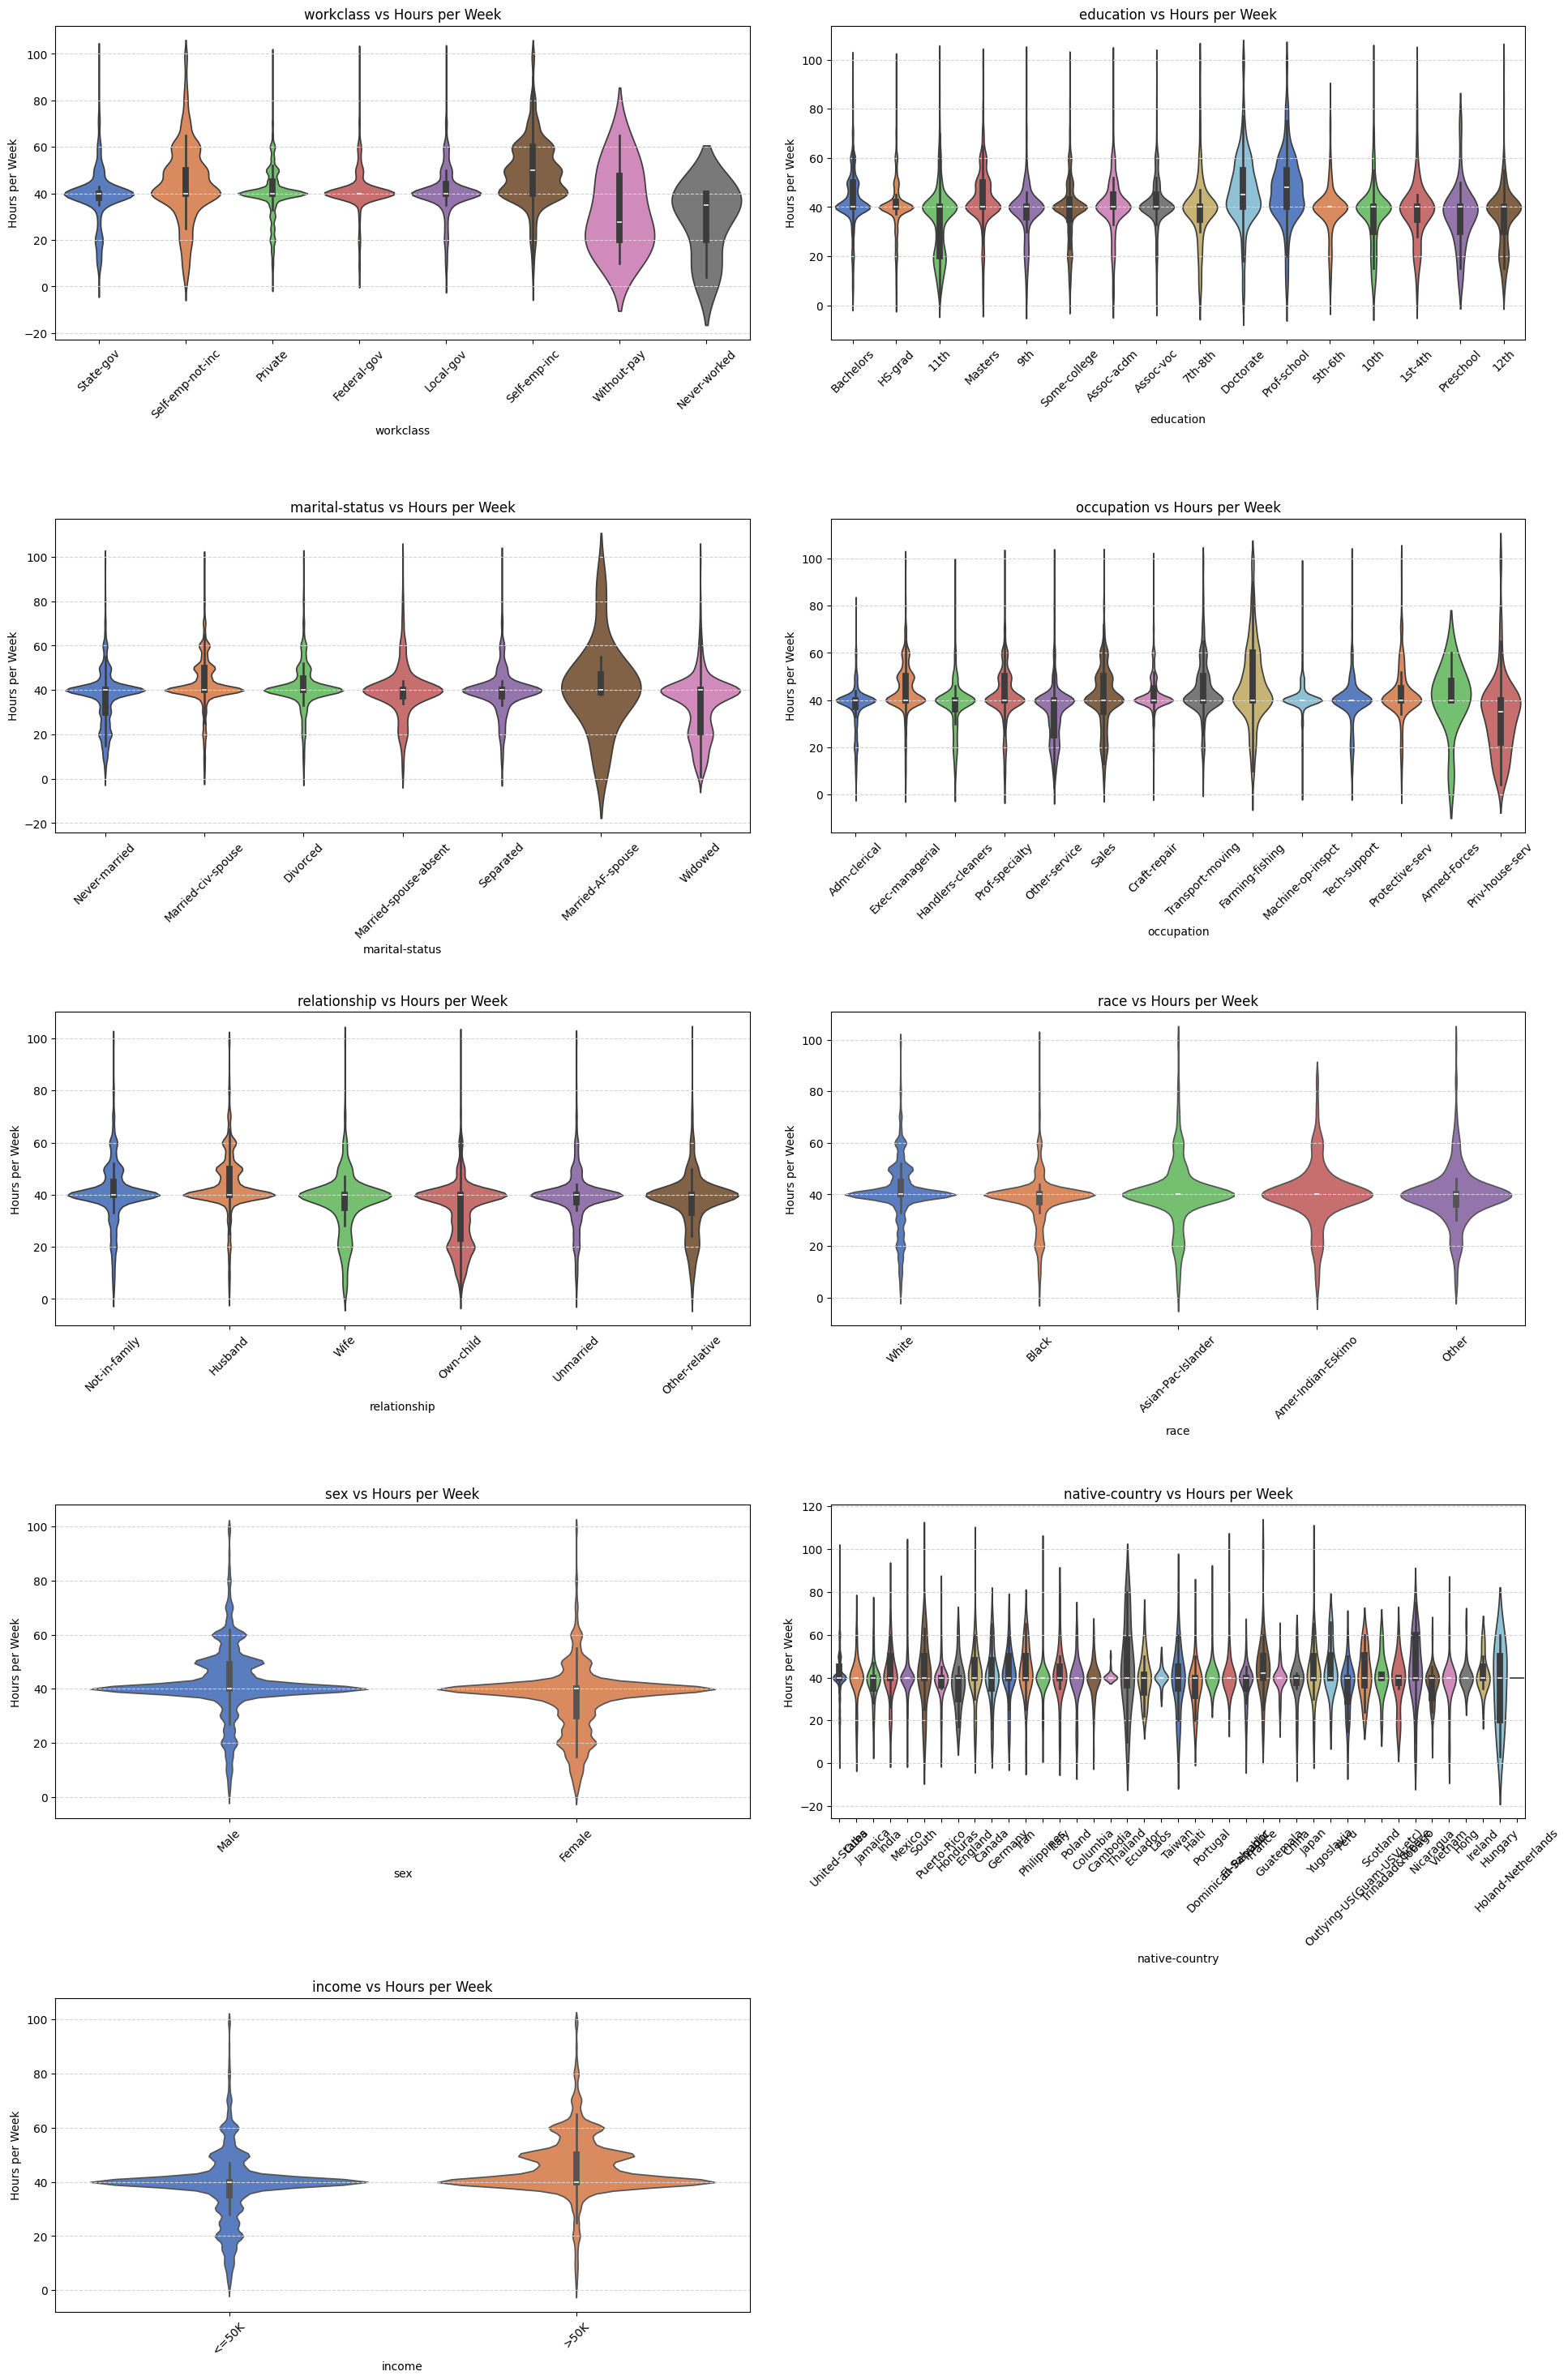

In [23]:
import math
# Categorical columns: 'education', 'marital-status', 'race'
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

# Define the number of rows and columns
num_cols = 2  # Number of plots per row
num_rows = math.ceil(len(categorical_cols) / num_cols)  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10 * num_cols, 6 * num_rows))
axes = axes.flatten()  # Flatten axes for easy indexing

# Loop through categorical columns and create violin plots
for i, var in enumerate(categorical_cols):
    sns.violinplot(
        data=data,
        x=var,
        y="hours-per-week",
        ax=axes[i],
        hue=var,
        palette="muted",
        legend=False  # Disable the legend as it's redundant
    )
    axes[i].set_title(f'{var} vs Hours per Week')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Hours per Week")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
    axes[i].grid(axis='y', linestyle='--', color='lightgray')  # Add dotted grid on y-axis

# Remove any unused subplots
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])


# Adjust the layout to avoid overlaps
plt.tight_layout(pad=3.0)

plt.show()

**Workclass vs. Hours per Week**
The distribution of weekly working hours varies across different work classes. Self-employed individuals and private-sector employees exhibit greater variability in their working hours, whereas government employees tend to have a more consistent range, typically around 40 hours per week. Those classified as working without pay or never having worked report significantly fewer working hours.

**Education vs. Hours per Week**
Higher levels of education, such as a Doctorate or Master’s degree, are generally associated with a concentration of working hours between 40 and 50 per week, though some variability is present. Conversely, individuals with lower levels of education, such as those with only a preschool education, tend to work fewer hours on average.

**Marital Status vs. Hours per Week**
Married individuals (classified as "Married-civ-spouse") exhibit the highest concentration of working hours, typically ranging between 40 and 50 per week. In contrast, individuals who are never married or divorced display greater variability, with some working significantly fewer hours.

**Occupation vs. Hours per Week**
Certain occupations, particularly those in executive, managerial, and professional specialties, show a higher concentration of individuals working between 40 and 50 hours per week. In contrast, occupations such as farming, fishing, and private household services have a higher proportion of individuals working fewer hours.

**Relationship vs. Hours per Week**
Individuals categorized as husbands tend to work the most consistently, with working hours concentrated between 40 and 50 per week. By contrast, individuals classified as "own child" or "unmarried" exhibit greater variability, with a tendency toward fewer working hours.

**Race vs. Hours per Week**
The distribution of weekly working hours appears relatively consistent across racial categories. However, slightly greater variability is observed among individuals identified as "Other" and "Asian-Pacific Islander."

**Sex vs. Hours per Week**
Males generally tend to work longer hours, displaying a broader range of working hours compared to females. Women’s working hours are more narrowly concentrated around the 40-hour mark.

**Native Country vs. Hours per Week**
There is considerable variation in working hours across different countries of origin. For instance, individuals from the United States tend to have a strong concentration around 40 hours per week, whereas those from Outlying U.S. territories and Honduras exhibit significantly lower average working hours.

**Income vs. Hours per Week**
Individuals earning more than $50,000 per year tend to work longer hours, typically between 40 and 50 per week. In contrast, those earning $50,000 or less display a broader distribution, with a higher proportion working fewer hours.

**General Observations**
Across most categories, a strong concentration around 40 hours per week is observed, reflecting standard full-time work schedules. However, certain variables, such as occupation, native country, and work class, exhibit greater variability in working hours.

Top 3 positive correlations:
        level_0        level_1  Correlation
0           age  education-num     0.036527
1  capital-gain   capital-loss    -0.031615
2  capital-loss   capital-gain    -0.031615


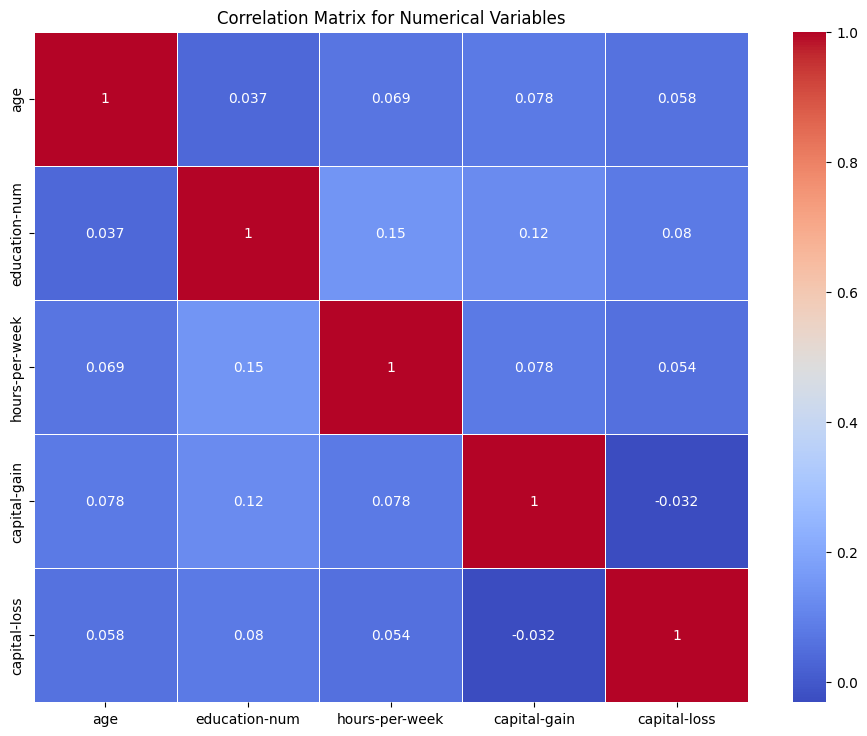

In [24]:
# Select numerical columns
numerical_cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss']
corr_matrix = data[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for Numerical Variables')

# Strongest correlations between variables
corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(ascending=False)

# Display top 3 correlations (excluding auto-correlations)
print("Top 3 positive correlations:")
top_3_df = sorted_pairs[-3:].reset_index().rename(columns={0: 'Correlation'})
print(top_3_df)

# Adjust the layout to avoid overlaps
plt.tight_layout(pad=3.0)

plt.show()

# **Summary Report from the EDA**

## 1. Distribution of Weekly Working Hours
Central Tendency:
The majority of individuals work between 40 and 50 hours per week, aligning with standard full-time work schedules.
Variability:
A smaller subset of individuals works either fewer than 30 hours or more than 60 hours per week.
Outliers:
Potential outliers are identified at both extremes, with some individuals working fewer than 20 or more than 80 hours per week.
Skewness:
The distribution appears right-skewed, indicating that a larger proportion of individuals work fewer hours rather than excessively long hours.
## 2. Demographic Variables
Education:
Higher levels of education, such as a Bachelor’s degree or Doctorate, are associated with more stable working hours, typically between 40 and 50 per week.
Marital Status:
Married individuals, particularly those classified as Married-civ-spouse, tend to work longer hours than those who are Never-married or Divorced.
Gender:
Males, on average, work longer hours per week compared to females.
## 3. Relationship Between Income and Hours Worked
Higher working hours are generally correlated with earning an income above $50,000.
Individuals earning $50,000 or less display greater variability in working hours, with a notable presence of part-time workers.
## 4. Correlation Analysis
Weekly working hours exhibit:
A positive correlation with education-num, suggesting that individuals with higher education levels tend to have more consistent working hours.
Weak or no correlation with capital-gain and capital-loss, indicating that investment-related financial factors do not significantly impact weekly work hours.
## 5. Occupational Trends
Professions such as Executive-Managerial and Professional-Specialty tend to have a strong concentration of individuals working 40–50 hours per week.
Lower-paying or labor-intensive occupations, such as Farming-Fishing, exhibit a wider distribution of working hours.
Unexpected Insights and Anomalies
1. Missing Data
Some categorical variables, including occupation, workclass, and native-country, contain missing values represented as ?. These require further processing through imputation or removal.
2. Outliers in Weekly Working Hours
Instances of extremely low (<10) or high (>90) reported working hours may indicate:
Data entry errors.
Unique employment situations, such as students, seasonal workers, or individuals engaged in informal labor.
3. Variability by Native Country
Individuals from non-U.S. countries exhibit significant variability in hours worked, which may reflect differing labor market conditions or cultural work norms.
## Areas for Further Investigation
Handling Missing Data

Address missing values in occupation, workclass, and native-country to ensure data completeness.
Assess the impact of missing data on overall findings and determine whether imputation or exclusion is appropriate.
Outlier Analysis

Further examine extreme cases of hours worked (<10 or >90) to determine their validity and potential impact on overall trends.
Income vs. Hours Worked

Conduct a more granular analysis to explore variations in working hours across different income brackets.
Categorical Variables

Investigate underrepresented categories within variables such as native-country to identify potential hidden patterns in work behavior.
